## 02 Artifact_Removal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pickle
from mne import Epochs, find_events
from IPython.display import clear_output

### 1. Loading Data

#### 1.1 Load pd

In [73]:
par = "par6"
file = "9-adam_aduio3_2021-04-03-07.08.49"
path = "./data/{file}".format(file = file)

In [74]:
df_visual = pd.read_csv(path)
df_visual.rename(columns = {'Unnamed: 1':'Fp1',
                            'Unnamed: 2':'Fp2',
                            'Unnamed: 3':'F3',
                            'Unnamed: 4':'F4',
                            'Unnamed: 5':'F7',
                            'Unnamed: 6':'F8',
                            'Unnamed: 7':'P3',
                            'Unnamed: 8':'P4'},
                            inplace=True)
df_visual

,timestamps,Fp1,Fp2,F3,F4,F7,F8,P3,P4,Marker
0,24253.464,11256.160,8777.709,22033.812,17525.311,23023.168,17492.721,16538.547,-33603.703,0
1,24253.465,11243.889,8895.592,22034.975,17522.158,23021.357,17488.652,16538.369,-34700.660,0
2,24253.465,11228.600,9378.926,22021.922,17507.496,23011.031,17472.270,16530.076,-35047.668,0
3,24253.465,11217.871,9563.015,22010.344,17497.482,23001.242,17462.836,16526.521,-35101.047,0
4,24253.465,11223.459,9205.477,22014.232,17506.758,23008.193,17474.371,16526.320,-35691.309,0
...,...,...,...,...,...,...,...,...,...,...
117727,24719.902,11319.616,7640.631,22466.320,17784.344,23463.096,17274.232,16407.209,2711.669,0
117728,24719.902,11328.513,7399.366,22470.119,17790.334,23466.672,17281.006,16414.205,2216.131,0
117729,24719.902,11329.720,7784.800,22469.381,17791.943,23466.471,17285.477,16416.082,2217.919,0
117730,24719.902,11319.616,8264.424,22458.562,17782.779,23454.535,17278.592,16406.695,2482.139,0


In [75]:
df_visual.drop('timestamps', axis=1, inplace=True)

Creating RawArray with float64 data, n_channels=9, n_times=117732
    Range : 0 ... 117731 =      0.000 ...   470.924 secs
Ready.
Effective window size : 8.192 (s)


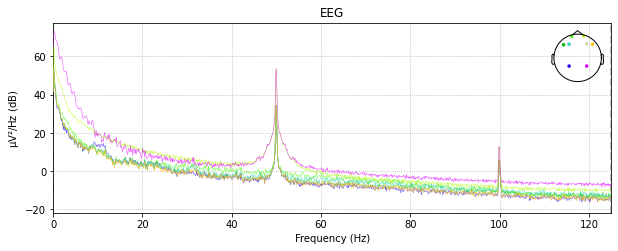

<RawArray | 9 x 117732 (470.9 s), ~8.1 MB, data loaded>

In [76]:
df_to_raw(df_visual)

Creating RawArray with float64 data, n_channels=9, n_times=115188
    Range : 0 ... 115187 =      0.000 ...   460.748 secs
Ready.
Effective window size : 8.192 (s)


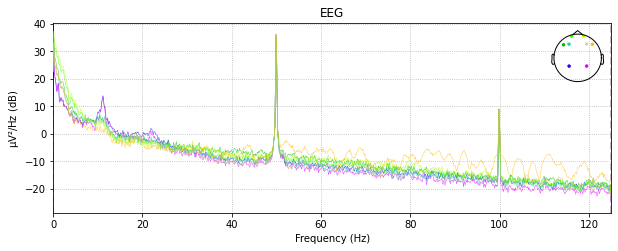

<RawArray | 9 x 115188 (460.7 s), ~7.9 MB, data loaded>

In [72]:
df_to_raw(df_visual)

Creating RawArray with float64 data, n_channels=9, n_times=116976
    Range : 0 ... 116975 =      0.000 ...   467.900 secs
Ready.
Effective window size : 8.192 (s)


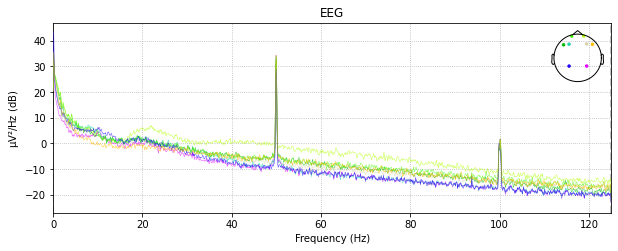

<RawArray | 9 x 116976 (467.9 s), ~8.1 MB, data loaded>

In [50]:
import mne
from mne import create_info
from mne.io import RawArray

def df_to_raw(df):
    sfreq = 250
    ch_names = list(df.columns)
    ch_types = ['eeg'] * (len(df.columns) - 1) + ['stim']
    ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

    df = df.T  #mne looks at the tranpose() format
    df[:-1] *= 1e-6  #convert from uVolts to Volts (mne assumes Volts data)

    info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)

    raw = mne.io.RawArray(df, info)
    raw.set_montage(ten_twenty_montage)

    #try plotting the raw data of its power spectral density
    raw.plot_psd()

    return raw

df_to_raw(df_visual)

Creating RawArray with float64 data, n_channels=9, n_times=113184
    Range : 0 ... 113183 =      0.000 ...   452.732 secs
Ready.
Effective window size : 8.192 (s)


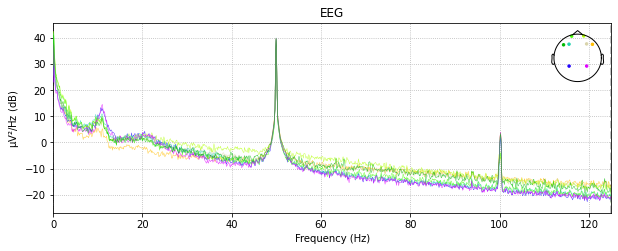

<RawArray | 9 x 113184 (452.7 s), ~7.8 MB, data loaded>

In [55]:
df_to_raw(df_visual)

Creating RawArray with float64 data, n_channels=9, n_times=133188
    Range : 0 ... 133187 =      0.000 ...   532.748 secs
Ready.
Effective window size : 8.192 (s)


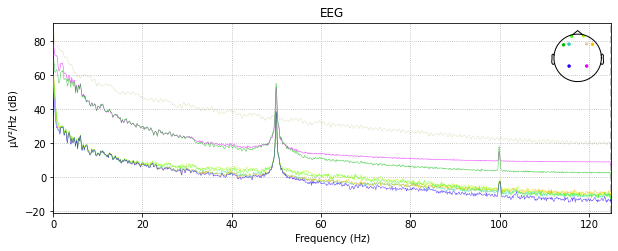

<RawArray | 9 x 133188 (532.7 s), ~9.2 MB, data loaded>

In [59]:
df_to_raw(df_visual)

Creating RawArray with float64 data, n_channels=9, n_times=118908
    Range : 0 ... 118907 =      0.000 ...   475.628 secs
Ready.
Effective window size : 8.192 (s)


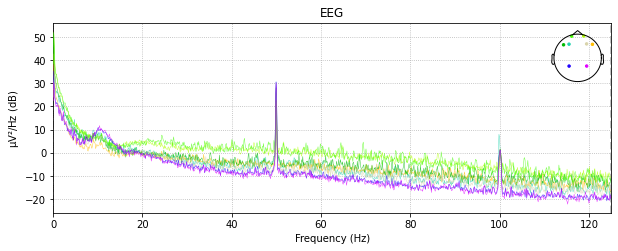

<RawArray | 9 x 118908 (475.6 s), ~8.2 MB, data loaded>

In [64]:
df_to_raw(df_visual)

Creating RawArray with float64 data, n_channels=9, n_times=114216
    Range : 0 ... 114215 =      0.000 ...   456.860 secs
Ready.
Effective window size : 8.192 (s)


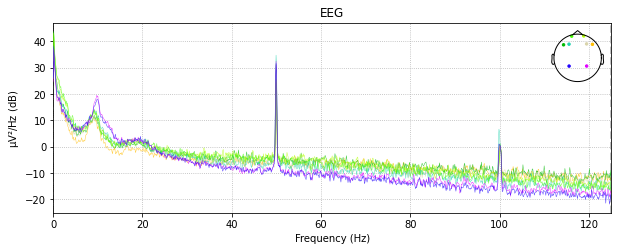

<RawArray | 9 x 114216 (456.9 s), ~7.9 MB, data loaded>

In [68]:
df_to_raw(df_visual)

In [51]:
raws = {}
for task_time in tasks_times:
    print(f"========================= {task_time} ==========================")
    raws[task_time] = df_to_raw(dfs_task_time[task_time])

NameError: name 'tasks_times' is not defined

Here I decided to keep stuff in a form of dictionary where **keys** indicate the **task and time**

In [3]:
path_tasks_times = ["_visual_1", "_visual_2", "_imagery_1", "_imagery_2"]
# Just wanted to make the names look nice

tasks_times = ["visual_1", "visual_2", "imagery_1", "imagery_2"]

dfs_task_time = {}

for i,task_time in enumerate(path_tasks_times):
    path = "data/pd/{par}/{file}{task_time}.pkl".format(par = par, file = file, task_time = task_time)
    f = open(path,'rb')
    df = pickle.load(f)
    dfs_task_time["{tasks_times}".format(tasks_times = tasks_times[i])] = df

#### 1.2 Rename Columns (for mne)

In [4]:
new_col  = {"FP1": "Fp1", "FP2": "Fp2"}
for task_time in tasks_times:
    dfs_task_time[task_time] = dfs_task_time[task_time].rename(columns=new_col)

In [5]:
dfs_task_time['visual_1']

,T3,T4,P4,P3,F4,F7,F3,F8,O2,O1,T5,T6,C3,C4,Fp1,Fp2,Marker
0,2064.340,-7923.559,-14504.382,-18060.566,9091.304,-22005.023,-22332.633,5455.524,-4908.555,-42192.316,-17164.955,-17718.004,-3309.354,-27120.623,-12615.928,-15099.363,0
1,1894.422,-8111.359,-14681.252,-18237.504,8905.605,-22191.504,-22525.508,5265.870,-5588.696,-42893.152,-17843.510,-18388.445,-4003.935,-27796.785,-13297.947,-15783.104,0
2,2316.110,-7588.529,-14139.088,-17694.469,9451.055,-21645.721,-21983.633,5803.921,-5017.833,-42299.492,-17273.451,-17825.740,-3419.794,-27230.414,-12743.758,-15230.345,0
3,1805.127,-8235.009,-14832.573,-18388.020,8770.735,-22335.494,-22661.941,5135.939,-5254.917,-42549.340,-17503.896,-18054.555,-3660.523,-27457.531,-12959.139,-15441.301,0
4,2215.259,-7699.192,-14242.219,-17795.834,9340.437,-21762.217,-22094.879,5689.771,-5433.754,-42728.621,-17687.293,-18236.186,-3846.087,-27647.633,-13165.826,-15648.479,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397375,9319.135,-757.188,-5376.399,-14925.132,22436.838,-5966.418,-7201.084,1069.732,-1403.690,-31749.781,-13150.984,-13704.146,9652.646,-18244.656,-7482.693,-13833.204,0
397376,9369.226,-744.961,-5383.977,-14927.345,22436.324,-5967.312,-7201.218,1059.137,-980.973,-31324.449,-12620.287,-13212.720,10127.754,-17788.881,-7039.212,-13377.966,0
397377,9087.348,-1018.971,-5658.478,-15207.434,22163.230,-6229.006,-7478.983,796.750,-1420.297,-31784.717,-13096.044,-13667.332,9664.515,-18239.828,-7480.838,-13832.176,0
397378,9488.182,-584.386,-5207.018,-14761.986,22620.770,-5775.892,-7027.209,1255.520,-1130.037,-31478.096,-12859.294,-13389.478,9937.340,-17956.184,-7202.648,-13545.693,0


In [6]:
dfs_task_time['imagery_1']

,T3,T4,P4,P3,F4,F7,F3,F8,O2,O1,T5,T6,C3,C4,Fp1,Fp2,Marker
0,2064.340,-7923.559,-14504.382,-18060.566,9091.304,-22005.023,-22332.633,5455.524,-4908.555,-42192.316,-17164.955,-17718.004,-3309.354,-27120.623,-12615.928,-15099.363,0
1,1894.422,-8111.359,-14681.252,-18237.504,8905.605,-22191.504,-22525.508,5265.870,-5588.696,-42893.152,-17843.510,-18388.445,-4003.935,-27796.785,-13297.947,-15783.104,0
2,2316.110,-7588.529,-14139.088,-17694.469,9451.055,-21645.721,-21983.633,5803.921,-5017.833,-42299.492,-17273.451,-17825.740,-3419.794,-27230.414,-12743.758,-15230.345,0
3,1805.127,-8235.009,-14832.573,-18388.020,8770.735,-22335.494,-22661.941,5135.939,-5254.917,-42549.340,-17503.896,-18054.555,-3660.523,-27457.531,-12959.139,-15441.301,0
4,2215.259,-7699.192,-14242.219,-17795.834,9340.437,-21762.217,-22094.879,5689.771,-5433.754,-42728.621,-17687.293,-18236.186,-3846.087,-27647.633,-13165.826,-15648.479,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397375,9319.135,-757.188,-5376.399,-14925.132,22436.838,-5966.418,-7201.084,1069.732,-1403.690,-31749.781,-13150.984,-13704.146,9652.646,-18244.656,-7482.693,-13833.204,0
397376,9369.226,-744.961,-5383.977,-14927.345,22436.324,-5967.312,-7201.218,1059.137,-980.973,-31324.449,-12620.287,-13212.720,10127.754,-17788.881,-7039.212,-13377.966,0
397377,9087.348,-1018.971,-5658.478,-15207.434,22163.230,-6229.006,-7478.983,796.750,-1420.297,-31784.717,-13096.044,-13667.332,9664.515,-18239.828,-7480.838,-13832.176,0
397378,9488.182,-584.386,-5207.018,-14761.986,22620.770,-5775.892,-7027.209,1255.520,-1130.037,-31478.096,-12859.294,-13389.478,9937.340,-17956.184,-7202.648,-13545.693,0


### 2. Artifact Removal

Artifacts that are restricted to a narrow frequency range can sometimes be repaired by filtering the data. Two examples of frequency-restricted artifacts are slow drifts and power line noise. Here we illustrate how each of these can be repaired by filtering.

But first we gonna use Python MNE as it provides many useful methods for achieving these tasks.  So first, we gonna transform our pandas to mne type.  Here is the function transforming df to raw mne.

In [4]:
import mne
from mne import create_info
from mne.io import RawArray

def df_to_raw(df):
    sfreq = 125
    ch_names = list(df.columns)
    ch_types = ['eeg'] * (len(df.columns) - 1) + ['stim']
    ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

    df = df.T  #mne looks at the tranpose() format
    df[:-1] *= 1e-6  #convert from uVolts to Volts (mne assumes Volts data)

    info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)

    raw = mne.io.RawArray(df, info)
    raw.set_montage(ten_twenty_montage)

    #try plotting the raw data of its power spectral density
    raw.plot_psd()

    return raw

Transform df to raw mne.

In [5]:
raws = {}
for task_time in tasks_times:
    print(f"========================= {task_time} ==========================")
    raws[task_time] = df_to_raw(dfs_task_time[task_time])

NameError: name 'tasks_times' is not defined

#### 1. Power line noise

Some artifacts are restricted to certain frequencies and can therefore be fixed by filtering. An artifact that typically affects only some frequencies is due to the power line.

Power-line noise is a noise created by the electrical network. It is composed of sharp peaks at 50Hz (or 60Hz depending on your geographical location). Some peaks may also be present at the harmonic frequencies, i.e. the integer multiples of the power-line frequency, e.g. 100Hz, 150Hz, … (or 120Hz, 180Hz, …).

Remove the 50Hz power line noise in Thailand.  We will also be remove its harmonics, i.e., 100Hz, 150Hz, etc.  Since our signal is 62.5Hz (125Hz / 2 according to Nyquist Theorem), we don't need to run the harmonics but simply notch the 50Hz signal.

In [9]:
for task_time in tasks_times:
    print(f"========================= {task_time} ==========================")    
    raws[task_time].notch_filter(50, filter_length='auto', phase='zero') #250/2 based on Nyquist Theorem

========================= visual_1 ==========================
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 sec)

========================= visual_2 ==========================
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff 

========================= visual_1 ==========================
Effective window size : 16.384 (s)


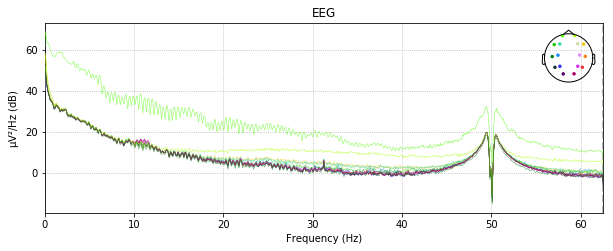

========================= visual_2 ==========================
Effective window size : 16.384 (s)


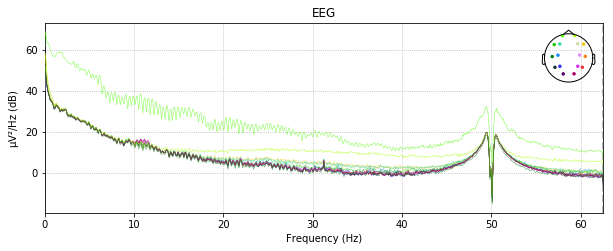

========================= imagery_1 ==========================
Effective window size : 16.384 (s)


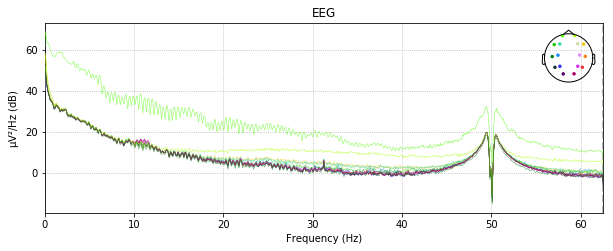

========================= imagery_2 ==========================
Effective window size : 16.384 (s)


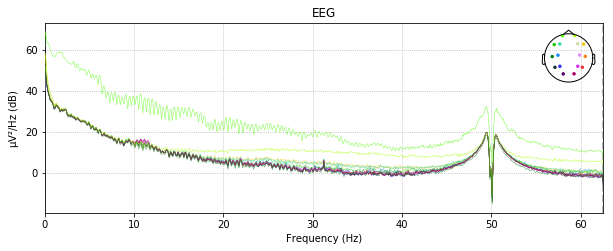

In [10]:
#observe that the 50Hz noise is now gone, yay!
for task_time in tasks_times:
    print(f"========================= {task_time} ==========================")
    raws[task_time].plot_psd()

#### 2. Slow drift

Low-frequency drifts in raw data can usually be spotted by plotting a fairly long span of data with the plot() method, though it is helpful to disable channel-wise DC shift correction to make slow drifts more readily visible. Here we plot 3600 seconds (since we perform a 60 minutes experiment), showing all the eeg channels:

========================= visual_1 ==========================


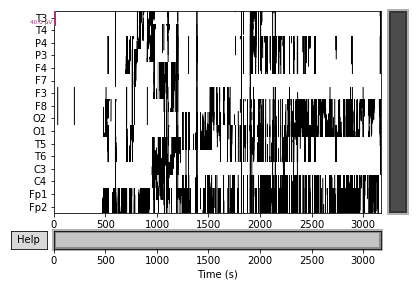

========================= visual_2 ==========================


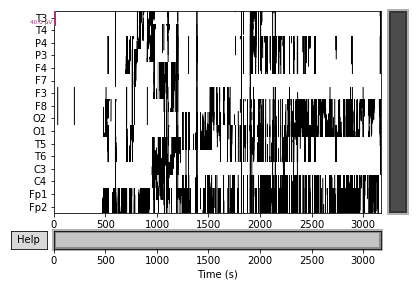

========================= imagery_1 ==========================


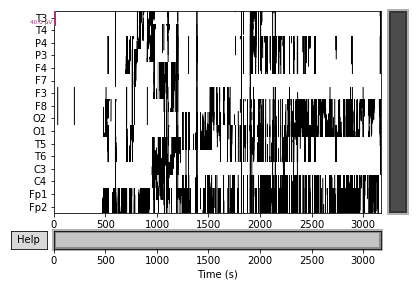

========================= imagery_2 ==========================


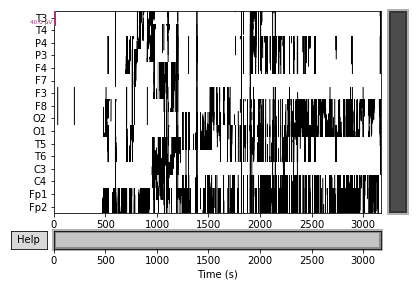

In [11]:
for task_time in tasks_times:
    print(f"========================= {task_time} ==========================")
    eeg_channels = mne.pick_types(raws[task_time].info, eeg=True)
    raws[task_time].plot(duration=5400, order=eeg_channels)

Notice that there are a lot of vertical black lines.  Those are drifts.  We can usually remove using low frequency high pass filter.  Here let's try 0.1, 0.2 and 1 Hz.

**change duration!!!!!!!!!!!**

========================= visual_1 ==========================
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 4125 samples (33.000 sec)



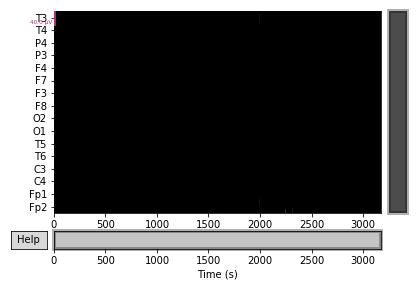

========================= visual_2 ==========================
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 4125 samples (33.000 sec)



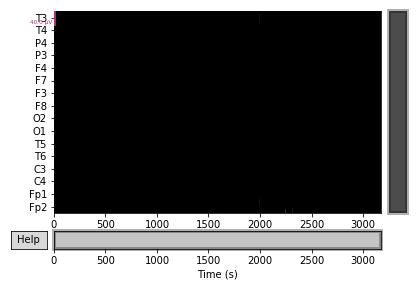

========================= imagery_1 ==========================
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 4125 samples (33.000 sec)



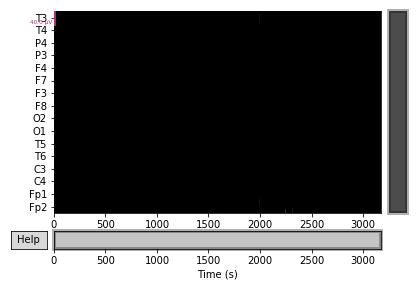

========================= imagery_2 ==========================
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 4125 samples (33.000 sec)



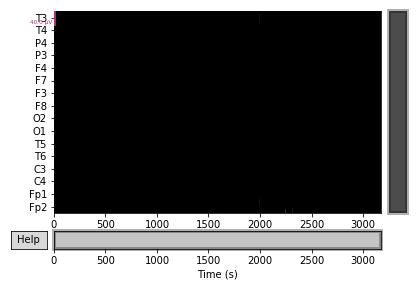

========================= visual_1 ==========================
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 2063 samples (16.504 sec)



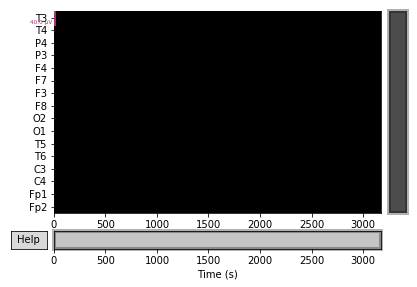

========================= visual_2 ==========================
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 2063 samples (16.504 sec)



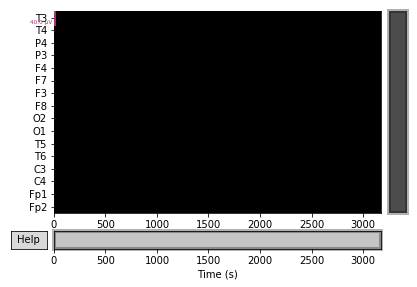

========================= imagery_1 ==========================
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 2063 samples (16.504 sec)



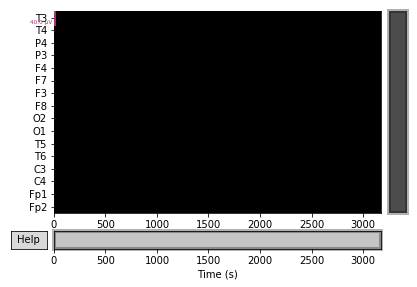

========================= imagery_2 ==========================
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 2063 samples (16.504 sec)



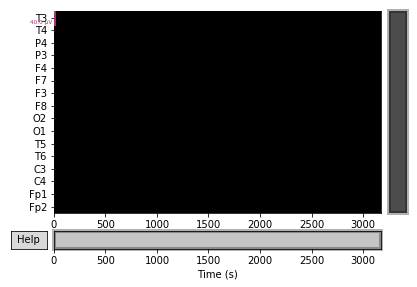

========================= visual_1 ==========================
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 413 samples (3.304 sec)



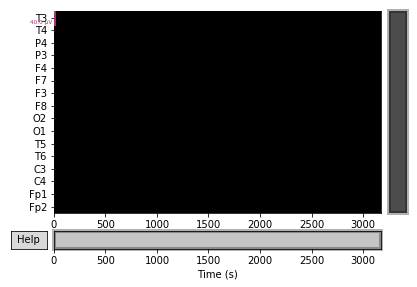

========================= visual_2 ==========================
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 413 samples (3.304 sec)



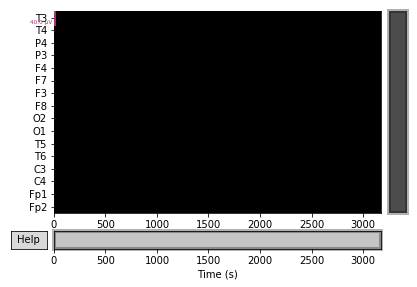

========================= imagery_1 ==========================
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 413 samples (3.304 sec)



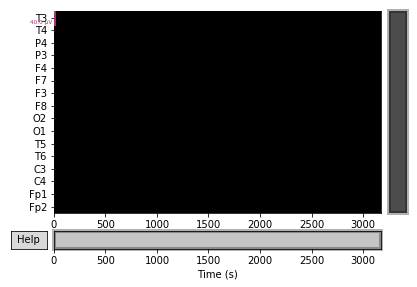

========================= imagery_2 ==========================
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 413 samples (3.304 sec)



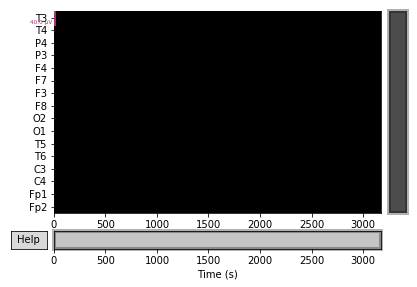

In [12]:
duration = 5400
for cutoff in (0.1, 0.2, 1):
    for task_time in tasks_times:
        print(f"========================= {task_time} ==========================")
        raw_highpass = raws[task_time].copy().filter(l_freq=cutoff, h_freq=None)
        fig = raw_highpass.plot(duration=duration, order=eeg_channels)
        fig.subplots_adjust(top=0.9)
        fig.suptitle('High-pass filtered at {} Hz'.format(cutoff), size='xx-large',
                     weight='bold')

Looks like 1Hz was quite quite good to fully remove the slow drifts. Usually, 1Hz is a good measure since most of the brain frequency lies around 1 to 40Hz.  Given that, we shall filter our brain signal to 1 to 40Hz.

========================= visual_1 ==========================
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

Effective window size : 16.384 (s)


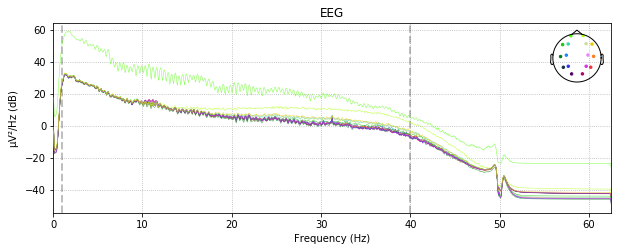

========================= visual_2 ==========================
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

Effective window size : 16.384 (s)


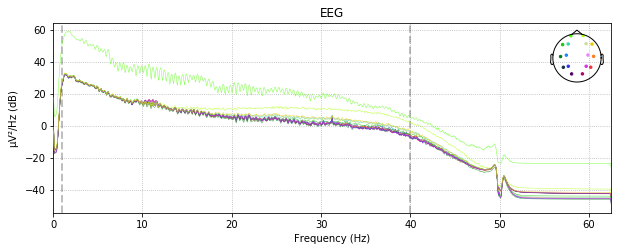

========================= imagery_1 ==========================
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

Effective window size : 16.384 (s)


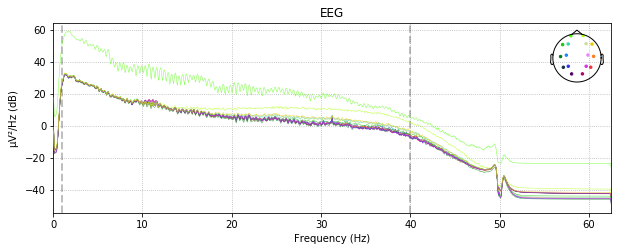

========================= imagery_2 ==========================
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

Effective window size : 16.384 (s)


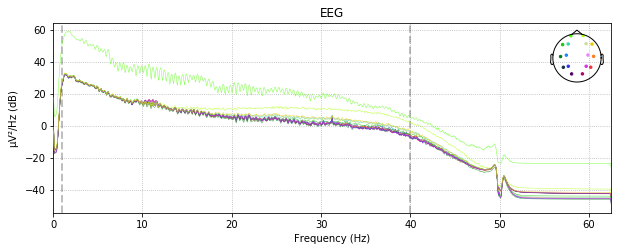

In [13]:
for task_time in tasks_times:
    print(f"========================= {task_time} ==========================")
    raws[task_time].filter(1, 40, method='iir')

    raws[task_time].plot_psd()

#### 3. Independent component analysis

Independent components analysis (ICA) is a technique for estimating independent source signals from a set of recordings in which the source signals were mixed together in unknown ratios. A common example of this is the problem of blind source separation: with 3 musical instruments playing in the same room, and 3 microphones recording the performance (each picking up all 3 instruments, but at varying levels), can you somehow “unmix” the signals recorded by the 3 microphones so that you end up with a separate “recording” isolating the sound of each instrument?

It is not hard to see how this analogy applies to EEG/MEG analysis: there are many “microphones” (sensor channels) simultaneously recording many “instruments” (blinks, heartbeats, activity in different areas of the brain, muscular activity from jaw clenching or swallowing, etc). As long as these various source signals are statistically independent and non-gaussian, it is usually possible to separate the sources using ICA, and then re-construct the sensor signals after excluding the sources that are unwanted.

MNE-Python implements three different ICA algorithms: fastica (the default), picard, and infomax. FastICA and Infomax are both in fairly widespread use; Picard is a newer (2017) algorithm that is expected to converge faster than FastICA and Infomax, and is more robust than other algorithms in cases where the sources are not completely independent, which typically happens with real EEG/MEG data

The ICA interface in MNE-Python is similar to the interface in scikit-learn: some general parameters are specified when creating an ICA object, then the ICA object is fit to the data using its fit() method. The results of the fitting are added to the ICA object as attributes that end in an underscore (_), such as ica.mixing_matrix_ and ica.unmixing_matrix_. After fitting, the ICA component(s) that you want to remove must be chosen, and the ICA fit must then be applied to the Raw or Epochs object using the ICA object’s apply() method.

After visualizing the Independent Components (ICs) and excluding any that capture artifacts you want to repair, the sensor signal can be reconstructed using the ICA object’s apply() method. By default, signal reconstruction uses all of the ICs (less any ICs listed in ICA.exclude) plus all of the PCs that were not included in the ICA decomposition (i.e., the “PCA residual”). If you want to reduce the number of components used at the reconstruction stage, it is controlled by the n_pca_components parameter (which will in turn reduce the rank of your data; by default n_pca_components = max_pca_components resulting in no additional dimensionality reduction). 

Before we run the ICA, an important step is filtering the data to remove low-frequency drifts, which can negatively affect the quality of the ICA fit. The slow drifts are problematic because they reduce the independence of the assumed-to-be-independent sources (e.g., during a slow upward drift, the neural, heartbeat, blink, and other muscular sources will all tend to have higher values), making it harder for the algorithm to find an accurate solution. **A high-pass filter with 1 Hz cutoff frequency is recommended before performing ICA.  However when we transform ICA (signal reconstruction), we reconstruct based on the original signal that did not perform 1Hz cutoff.** However, because filtering is a linear operation, the ICA solution found from the filtered signal can be applied to the unfiltered signal, so we’ll keep a copy of the unfiltered Raw object around so we can apply the ICA solution to it later.

In [14]:
# #filtering to remove slow drifts; also make copy of raw for later signal reconstruction
# from mne.preprocessing import ICA

# filt_raw = raw.copy()
# filt_raw.load_data().filter(l_freq=1., h_freq=None)
# filt_raw.plot_psd()

Now we’re ready to set up and fit the ICA. **We’ll run ICA with n_components=16 since we only have 16 channels.**  If we have more, then we may pick a smaller number.  How small?  There is no answer, but clearly, we want to try until we can see the eye, muscle components, etc.  But too large the component will slow the fit() process.

ICA fitting is not deterministic (e.g., the components may get a sign flip on different runs, or may not always be returned in the same order), so we’ll also specify a random seed so that we get identical results each time this file is run.

In [15]:
# # set up and fit the ICA
# ica = ICA(n_components=16, random_state=32)
# ica.fit(filt_raw)

Now we can examine the ICs to see what they captured. plot_sources() will show the time series of the ICs. Note that in our call to plot_sources() we can use the original, unfiltered Raw object:

In [16]:
# ica.plot_sources(filt_raw)
# ica.plot_components()

From the picture above, component 0 and 1 are suspicious of eye artifact. The time series shows that the first component is quite stable which is not indicative of brain components.  The time series also shows that the second component feels like it is a eye component.   For details how to look at this, please refer to https://labeling.ucsd.edu/tutorial/labels.   We shall plot the properties of ICA component 0 and 1 more closely.

In [17]:
# ica.plot_properties(filt_raw, picks=[0, 1])

Clearly, looking at the time series data, the first component is definitely not a brain component.  It could be due to the fault of the device or the setup.  For the second component, it is not straightforward as typically eye artifacts are mostly spikes, but here it looks like a mix of brain and eye.  

For more in-depth analysis, we can alo plot an overlay of the original signal against the reconstructed signal with the artifactual ICs excluded, using plot_overlay():

In [18]:
#test excluding 0, 1 component
# ica.plot_overlay(filt_raw, exclude=[0, 1], picks='eeg')

Seems like removing component 0 does not even change the signal, meaning that component 0 can be safely removed.  Removing component 1 also seems to help removing the big spike thus is recommended.

Once we’re certain which components we want to exclude, we can specify that manually by setting the **ica.exclude** attribute. Similar to marking bad channels, merely setting ica.exclude doesn’t do anything immediately (it just adds the excluded ICs to a list that will get used later when it’s needed). Once the exclusions have been set, ICA methods like plot_overlay() will exclude those component(s) even if no exclude parameter is passed, and the list of excluded components will be preserved when using mne.preprocessing.ICA.save() and mne.preprocessing.read_ica().

In [19]:
# ica.exclude = [0, 1] #we want to cut down the 0, 1 component, then apply(self) to reconstruct the signal

Once we’re confident about which component(s) we want to remove, we pass them as the exclude parameter and then apply the ICA to the raw signal. The apply() method requires the raw data to be loaded into memory (by default it’s only read from disk as-needed), so we’ll use load_data() first. We’ll also make a copy of the Raw object so we can compare the signal before and after artifact removal side-by-side:

In [20]:
# ica.apply() changes the Raw object in-place, so let's make a copy first for comparison:
# orig_raw = raw.copy()  #we apply ica to raw
# ica.apply(raw)

Let's plot the original raw against the filtered raw

In [21]:
# orig_raw.plot(order=eeg_channels, duration=20)
# raw.plot(order=eeg_channels, duration=20)

### 2. Epoching and Save Data as np

In [22]:
def getEpochs(raw, event_id, tmin, tmax, picks):

    #epoching
    events = find_events(raw)
    
    #reject_criteria = dict(mag=4000e-15,     # 4000 fT
    #                       grad=4000e-13,    # 4000 fT/cm
    #                       eeg=100e-6,       # 150 μV
    #                       eog=250e-6)       # 250 μV

    reject_criteria = dict(eeg=100e-6)  #most voltage in this range is not brain components

    epochs = Epochs(raw, events=events, event_id=event_id, 
                    tmin=tmin, tmax=tmax, baseline=None, preload=True,verbose=False, picks=picks)  #8 channels
    print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)

    return epochs

In [23]:
#this one requires expertise to specify the right tmin, tmax

event_id = {'0': 1, '1' : 2, '2': 3, '3':4, '4':5, '5':6}
tmin = 0 #0
epochs = {}
for task_time in tasks_times:
    if task_time in ['visual_1', 'imagery_1']:
        tmax = 1
    else:
        tmax = 2
    picks= eeg_channels
    epochs = getEpochs(raws[task_time], event_id, tmin, tmax, picks)
    X = epochs.get_data()
    y = epochs.events[:, -1]
    y = y-1
    np.save("data/np/{par}/{file}_{task_time}_X".format(par=par, file=file, task_time = task_time), X)
    np.save("data/np/{par}/{file}_{task_time}_y".format(par=par, file=file, task_time = task_time), y)

221 events found
Event IDs: [1 2 3 4 5 6]
sample drop %:  0.0
229 events found
Event IDs: [1 2 3 4 5 6]
sample drop %:  0.0
221 events found
Event IDs: [1 2 3 4 5 6]
sample drop %:  0.0
229 events found
Event IDs: [1 2 3 4 5 6]
sample drop %:  0.0
